# Estuardo Funes Solares
# Carnet: 20032042
# Tarea 1: Ingeniería de Características

## Importación de librerías

In [1]:
# Se importan las librerías que se van a utilizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Se ve la estructura del dataset, 1460 registros y 81 variables o columnas

dataHP = pd.read_csv('train_HP.csv')
dataHP.shape

(1460, 81)

In [3]:
# Una vista rápida de los datos

dataHP.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
# 81 columnas

col = dataHP.columns
len(col)

81

### Viendo el dataframe se ve que hay valores "0"
### estos valores se asumen que son valores 0 y no faltantes, es decir, por ejemplo en la Variable PoolQC = 0 
### se deja y se entiende que esa casa no tiene Pool y por ende su valore es "0", no significa que no se haya registrado y sea faltante  

In [5]:
# Porcentaje de NaNs en las columnas, se puede ver que solo en algunas se tienen faltantes, en algunos casos de manera extrema en otras de manera reducida

Porcentajes =  dataHP.isnull().mean().sort_values(ascending=False)
Porcentajes.head(40)

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
LotFrontage      0.177397
GarageYrBlt      0.055479
GarageCond       0.055479
GarageType       0.055479
GarageFinish     0.055479
GarageQual       0.055479
BsmtFinType2     0.026027
BsmtExposure     0.026027
BsmtQual         0.025342
BsmtCond         0.025342
BsmtFinType1     0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
Id               0.000000
Functional       0.000000
Fireplaces       0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
FullBath         0.000000
BsmtHalfBath     0.000000
TotRmsAbvGrd     0.000000
GarageCars       0.000000
GrLivArea        0.000000
GarageArea       0.000000
PavedDrive       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea    

In [6]:
# Se hace un backup de la tabla

olddataHP = dataHP
olddataHP.shape

(1460, 81)

In [7]:
dataHP.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Se revisan algunas columnas para ver cómo viene los faltantes

In [8]:
# Se ve que cómo vienen los faltantes, en este caso viene "0".

dataHP['MasVnrArea']

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

In [9]:
# Se ve que cómo vienen los faltantes, en este caso viene "NaN".

dataHP['LotFrontage'].head(40)

0      65.0
1      80.0
2      68.0
3      60.0
4      84.0
5      85.0
6      75.0
7       NaN
8      51.0
9      50.0
10     70.0
11     85.0
12      NaN
13     91.0
14      NaN
15     51.0
16      NaN
17     72.0
18     66.0
19     70.0
20    101.0
21     57.0
22     75.0
23     44.0
24      NaN
25    110.0
26     60.0
27     98.0
28     47.0
29     60.0
30     50.0
31      NaN
32     85.0
33     70.0
34     60.0
35    108.0
36    112.0
37     74.0
38     68.0
39     65.0
Name: LotFrontage, dtype: float64

In [10]:
# Se ve que cómo vienen los faltantes, en este caso viene "NaN".

dataHP['GarageYrBlt'].head(40)

0     2003.0
1     1976.0
2     2001.0
3     1998.0
4     2000.0
5     1993.0
6     2004.0
7     1973.0
8     1931.0
9     1939.0
10    1965.0
11    2005.0
12    1962.0
13    2006.0
14    1960.0
15    1991.0
16    1970.0
17    1967.0
18    2004.0
19    1958.0
20    2005.0
21    1930.0
22    2002.0
23    1976.0
24    1968.0
25    2007.0
26    2005.0
27    2008.0
28    1957.0
29    1920.0
30    1920.0
31    1966.0
32    2007.0
33    1959.0
34    2005.0
35    2004.0
36    1995.0
37    1954.0
38    1953.0
39       NaN
Name: GarageYrBlt, dtype: float64

In [11]:
# Extraemos los nombres de las columnas

cols_con_na = [col for col in dataHP.columns]
cols_con_na

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

### Extraemos Columnas con NAN

In [12]:
# Columnas que tienen al menos un registro con NaN

cols_con_na = [col for col in dataHP.columns if (dataHP[col].isnull().mean() > 0)]
cols_con_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

### Proporción de NAN en las columnas

In [13]:
# Proporción de NaN en cada columna. Podemos ver que son 19 columnas en total con NaN

prop_nan_per_col = dataHP[cols_con_na].isnull().mean().sort_values(ascending=False)
prop_nan_per_col

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

#### Columnas con NaN mayor a 20%

In [14]:
# Estas columnas se van a desechar, no se van a trabajar porque su porcentaje es demasiado alto

cols_con_na_mayor5porct = [col for col in dataHP.columns if (dataHP[col].isnull().mean() > 0.2)]
cols_con_na_mayor5porct

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

##### En base a lo anterior podemos ver que las variables que tienen altos porcentajes de NaN y que se han eliminado completamente del análisis son:

##### - PoolQC 
##### - MiscFeature
##### - Alley 
##### - Fence

In [15]:
# Vemos que los porcentajes de NaN son demasiados altos, no vale la pena trabajar con estas columnas

print(f"PoolQC:      {round(dataHP['PoolQC'].isnull().mean(),4)}")
print(f"MiscFeature: {round(dataHP['MiscFeature'].isnull().mean(),4)}")
print(f"Alley:       {round(dataHP['Alley'].isnull().mean(),4)}")
print(f"Fence:       {round(dataHP['Fence'].isnull().mean(),4)}")
print(f"FireplaceQu: {round(dataHP['FireplaceQu'].isnull().mean(),4)}")

PoolQC:      0.9952
MiscFeature: 0.963
Alley:       0.9377
Fence:       0.8075
FireplaceQu: 0.4726


In [16]:
# Se eliminan las columnas con NaN mayores a 20%

dataHP = dataHP.drop([col for col in dataHP.columns if (dataHP[col].isnull().mean() > 0.50)], axis=1)

In [17]:
# Tipo de datos de cada columna

dataHP.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 77, dtype: object

In [18]:
col2 = dataHP.columns
len(col2)

77

In [19]:
dataHP.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

### Columnas Rescatables

In [20]:
cols_rescatables = [col for col in dataHP.columns if (dataHP[col].isnull().mean()<=0.05)]
cols_rescatables

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

In [21]:
# Estas columnas todavía se pueden trabajar porque sus NaN son menores de 20%

cols_con_na_entre5_20 = [col for col in dataHP.columns if (dataHP[col].isnull().mean() > 0 and dataHP[col].isnull().mean() < 0.20)]
cols_con_na_entre5_20

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

##### Las variables que se le aplicará Imputación de Variable de Media porque el porcentaje está entre 5% y 20% son:

##### - LotFrontage 
##### - MasVnrType 
##### - MasVnrArea 
##### - BsmtQual 
##### - BsmtCond 
##### - BsmtExposure 
##### - BsmtFinType1 
##### - BsmtFinType2 
##### - Electrical 
##### - GarageType 
##### - GarageYrBlt 
##### - GarageFinish 
##### - GarageCond 


In [22]:
# Vemos que los porcentajes de NaN son bajos, todavía se pueden trabajar o hacer imputación

print(f"LotFrontage:   {round(dataHP['LotFrontage'].isnull().mean(),4)}")
print(f"MasVnrType:    {round(dataHP['MasVnrType'].isnull().mean(),4)}")
print(f"MasVnrArea:    {round(dataHP['MasVnrArea'].isnull().mean(),4)}")
print(f"BsmtQual:      {round(dataHP['BsmtQual'].isnull().mean(),4)}")
print(f"BsmtCond:      {round(dataHP['BsmtCond'].isnull().mean(),4)}")
print(f"BsmtExposure:  {round(dataHP['BsmtExposure'].isnull().mean(),4)}")
print(f"BsmtFinType1:  {round(dataHP['BsmtFinType1'].isnull().mean(),4)}")
print(f"BsmtFinType2:  {round(dataHP['BsmtFinType2'].isnull().mean(),4)}")
print(f"Electrical:    {round(dataHP['Electrical'].isnull().mean(),4)}")
print(f"GarageType:    {round(dataHP['GarageType'].isnull().mean(),4)}")
print(f"GarageYrBlt:   {round(dataHP['GarageYrBlt'].isnull().mean(),4)}")
print(f"GarageFinish:  {round(dataHP['GarageFinish'].isnull().mean(),4)}")
print(f"GarageQual:    {round(dataHP['GarageQual'].isnull().mean(),4)}")
print(f"GarageCond:    {round(dataHP['GarageCond'].isnull().mean(),4)}")


LotFrontage:   0.1774
MasVnrType:    0.0055
MasVnrArea:    0.0055
BsmtQual:      0.0253
BsmtCond:      0.0253
BsmtExposure:  0.026
BsmtFinType1:  0.0253
BsmtFinType2:  0.026
Electrical:    0.0007
GarageType:    0.0555
GarageYrBlt:   0.0555
GarageFinish:  0.0555
GarageQual:    0.0555
GarageCond:    0.0555


In [23]:
# Vemos los primeros 40 registros de las variables Rescatables para ver más a fondo los datos

dataHP[['LotFrontage', 'MasVnrType', 'MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageYrBlt','GarageFinish','GarageCond']].head(40)
#data_HP_con_na_entre5_20.head(40)

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageCond
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA
1,80.0,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA
3,60.0,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA
5,85.0,None,0.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,1993.0,Unf,TA
6,75.0,Stone,186.0,Ex,TA,Av,GLQ,Unf,SBrkr,Attchd,2004.0,RFn,TA
7,NaN,Stone,240.0,Gd,TA,Mn,ALQ,BLQ,SBrkr,Attchd,1973.0,RFn,TA
8,51.0,None,0.0,TA,TA,No,Unf,Unf,FuseF,Detchd,1931.0,Unf,TA
9,50.0,None,0.0,TA,TA,No,GLQ,Unf,SBrkr,Attchd,1939.0,RFn,TA


### Tipos de Variables de cada Columna ya sin Variables con NaN mayores a 20%

In [24]:
# Sacamos el tipo de variable solamente de las columnas con NaN

dataHP.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 77, dtype: object

### Complete Case Analysis (CCA)

In [25]:
data_HP_con_na_entre5_20 = dataHP[cols_con_na_entre5_20].dropna()
dataHP.shape, data_HP_con_na_entre5_20.shape


((1460, 77), (1094, 14))

In [26]:
data_HP_con_na_entre5_20.head(40)

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,80.0,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,60.0,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA
5,85.0,None,0.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,1993.0,Unf,TA,TA
6,75.0,Stone,186.0,Ex,TA,Av,GLQ,Unf,SBrkr,Attchd,2004.0,RFn,TA,TA
8,51.0,None,0.0,TA,TA,No,Unf,Unf,FuseF,Detchd,1931.0,Unf,Fa,TA
9,50.0,None,0.0,TA,TA,No,GLQ,Unf,SBrkr,Attchd,1939.0,RFn,Gd,TA
10,70.0,None,0.0,TA,TA,No,Rec,Unf,SBrkr,Detchd,1965.0,Unf,TA,TA


In [27]:
# Dejamos solo las columnas que tienen casos completos, es decir, no tienen ningún NAN o nulo.
data_HP_noNAN = dataHP[cols_rescatables].dropna()
dataHP.shape, data_HP_noNAN.shape

((1460, 77), (1412, 70))

In [28]:
data_HP_noNAN.head(40)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


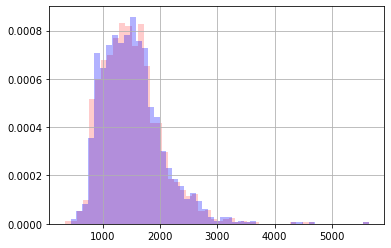

In [29]:
dataHP['GrLivArea'].hist(bins=50, density=True, color='red', alpha=0.2)
data_HP_noNAN['GrLivArea'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

### Imputación de Valores Numéricos con Media o Mediana

In [30]:
#Dataset Original
dataHP

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [31]:
# Columnas Rescatables

data_HP_noNAN.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'Y

In [32]:
#Dataset solo de Columnas Rescatables

data_HP_con_na_entre5_20.head(40)

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,80.0,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,60.0,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA
5,85.0,None,0.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,1993.0,Unf,TA,TA
6,75.0,Stone,186.0,Ex,TA,Av,GLQ,Unf,SBrkr,Attchd,2004.0,RFn,TA,TA
8,51.0,None,0.0,TA,TA,No,Unf,Unf,FuseF,Detchd,1931.0,Unf,Fa,TA
9,50.0,None,0.0,TA,TA,No,GLQ,Unf,SBrkr,Attchd,1939.0,RFn,Gd,TA
10,70.0,None,0.0,TA,TA,No,Rec,Unf,SBrkr,Detchd,1965.0,Unf,TA,TA


### Hacemos imputación de Media en Columnas Numéricas

#### Variable _LotFrontage_

In [33]:
LotFrontage_media = dataHP['LotFrontage'].mean()
LotFrontage_mediana = dataHP['LotFrontage'].median()
print(f"Media de Columna LotFrontage:  {LotFrontage_media}")
print(f"Median de Columna LotFrontage: {LotFrontage_mediana}")

Media de Columna LotFrontage:  70.04995836802665
Median de Columna LotFrontage: 69.0


In [34]:
dataHP['LotFrontage_media']=np.round(dataHP['LotFrontage'].fillna(LotFrontage_media))
dataHP['LotFrontage_mediana']=np.round(dataHP['LotFrontage'].fillna(LotFrontage_mediana))

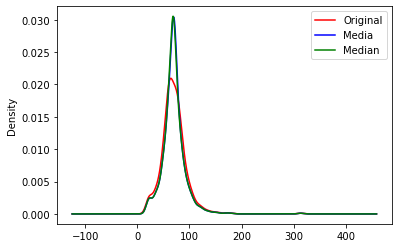

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataHP['LotFrontage'].plot.density(color='red', label='Original')
dataHP['LotFrontage_media'].plot.density(color='blue', label='Media')
dataHP['LotFrontage_mediana'].plot.density(color='green', label='Median')
ax.legend()

In [36]:
# Confirmación de que si se hizo correctamente la imputación de media

dataHP[['LotFrontage', 'LotFrontage_media', 'LotFrontage_mediana']].head(10)

,LotFrontage,LotFrontage_media,LotFrontage_mediana
0,65.0,65.0,65.0
1,80.0,80.0,80.0
2,68.0,68.0,68.0
3,60.0,60.0,60.0
4,84.0,84.0,84.0
5,85.0,85.0,85.0
6,75.0,75.0,75.0
7,NaN,70.0,69.0
8,51.0,51.0,51.0
9,50.0,50.0,50.0


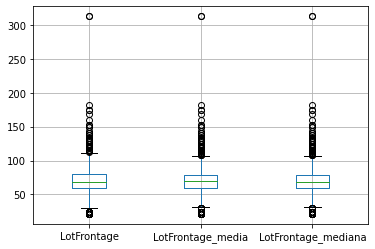

In [37]:
dataHP[['LotFrontage', 'LotFrontage_media', 'LotFrontage_mediana']].boxplot()
plt.show()

In [38]:
dataHP['MasVnrArea']

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

#### Variable _MasVnrArea_

In [39]:
MasVnrArea_media = dataHP['MasVnrArea'].mean()
MasVnrArea_mediana = dataHP['MasVnrArea'].median()
print(f"Media de Columna MasVnrArea:{MasVnrArea_media}")
print(f"Median de Columna MasVnrArea:{MasVnrArea_mediana}")

Media de Columna MasVnrArea:103.68526170798899
Median de Columna MasVnrArea:0.0


In [40]:
# Debido a que en la Columna MasVnrArea no hay NaN, solo valores "0" primero se hace el reemplazo de 0 por NaN para después si llenarlos 
# con la media obtenida

dataHP['MasVnrArea'].replace(0, np.nan, inplace=True)


In [41]:
dataHP['MasVnrArea']

0       196.0
1         NaN
2       162.0
3         NaN
4       350.0
        ...  
1455      NaN
1456    119.0
1457      NaN
1458      NaN
1459      NaN
Name: MasVnrArea, Length: 1460, dtype: float64

In [42]:
dataHP['MasVnrArea_media']=np.round(dataHP['MasVnrArea'].fillna(MasVnrArea_media))
dataHP['MasVnrArea_mediana']=np.round(dataHP['MasVnrArea'].fillna(MasVnrArea_mediana))

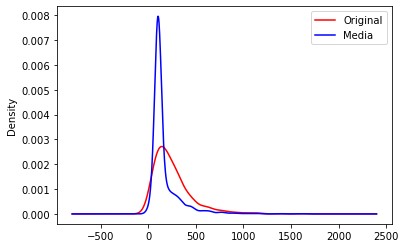

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataHP['MasVnrArea'].plot.density(color='red', label='Original')
dataHP['MasVnrArea_media'].plot.density(color='blue', label='Media')
#dataHP['MasVnrArea_median'].plot.density(color='green', label='Median') #La mediana da "0"
ax.legend()

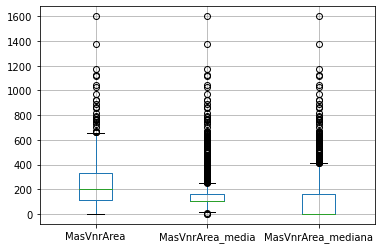

In [44]:
dataHP[['MasVnrArea', 'MasVnrArea_media', 'MasVnrArea_mediana']].boxplot()
plt.show()

In [45]:
# Confirmación de que si se hizo correctamente la imputación de media

dataHP[['MasVnrArea','MasVnrArea_media','MasVnrArea_mediana']].head(10)

,MasVnrArea,MasVnrArea_media,MasVnrArea_mediana
0,196.0,196.0,196.0
1,NaN,104.0,0.0
2,162.0,162.0,162.0
3,NaN,104.0,0.0
4,350.0,350.0,350.0
5,NaN,104.0,0.0
6,186.0,186.0,186.0
7,240.0,240.0,240.0
8,NaN,104.0,0.0
9,NaN,104.0,0.0


#### Variable _GarageYrBlt_

In [46]:
GarageYrBlt_media = dataHP['GarageYrBlt'].mean()
GarageYrBlt_mediana = dataHP['GarageYrBlt'].median()
print(f"Media de la Columna GarageYrBlt:{GarageYrBlt_media}")
print(f"Median de la Columna GarageYrBlt:{GarageYrBlt_mediana}")

Media de la Columna GarageYrBlt:1978.5061638868744
Median de la Columna GarageYrBlt:1980.0


In [47]:
dataHP['GarageYrBlt_media']=np.round(dataHP['GarageYrBlt'].fillna(GarageYrBlt_media))
dataHP['GarageYrBlt_mediana']=np.round(dataHP['GarageYrBlt'].fillna(GarageYrBlt_mediana))

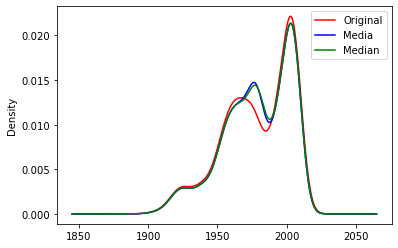

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataHP['GarageYrBlt'].plot.density(color='red', label='Original')
dataHP['GarageYrBlt_media'].plot.density(color='blue', label='Media')
dataHP['GarageYrBlt_mediana'].plot.density(color='green', label='Median')
ax.legend()

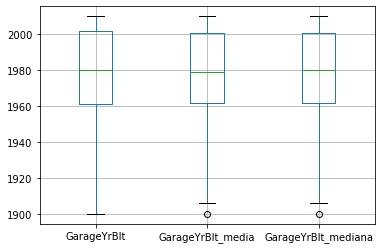

In [49]:
dataHP[['GarageYrBlt', 'GarageYrBlt_media', 'GarageYrBlt_mediana']].boxplot()
plt.show()

In [50]:
# Confirmación de que si se hizo correctamente la imputación de media

dataHP[['GarageYrBlt', 'GarageYrBlt_media', 'GarageYrBlt_mediana']].head(40)

,GarageYrBlt,GarageYrBlt_media,GarageYrBlt_mediana
0,2003.0,2003.0,2003.0
1,1976.0,1976.0,1976.0
2,2001.0,2001.0,2001.0
3,1998.0,1998.0,1998.0
4,2000.0,2000.0,2000.0
5,1993.0,1993.0,1993.0
6,2004.0,2004.0,2004.0
7,1973.0,1973.0,1973.0
8,1931.0,1931.0,1931.0
9,1939.0,1939.0,1939.0


### Imputación de Valores Categóricas

In [51]:
# Dataset solamente con las variables categóricas
dataset_cat_missing = dataHP[['MasVnrType', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageCond', 'SalePrice']]
dataset_cat_missing

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageCond,SalePrice
0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,208500
1,None,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,181500
2,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,223500
3,None,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,Unf,TA,140000
4,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,None,Gd,TA,No,Unf,Unf,SBrkr,Attchd,RFn,TA,175000
1456,Stone,Gd,TA,No,ALQ,Rec,SBrkr,Attchd,Unf,TA,210000
1457,None,TA,Gd,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,266500
1458,None,TA,TA,Mn,GLQ,Rec,FuseA,Attchd,Unf,TA,142125


In [52]:
# Viendo la cantidad de NAN de las columnas categóricas nuevamente

dataset_cat_missing.isnull().mean().sort_values(ascending=False)

GarageType      0.055479
GarageFinish    0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrType      0.005479
Electrical      0.000685
SalePrice       0.000000
dtype: float64

#### Variable _MasVnrType_

In [53]:
# Revisando cuántos registros trae la variable de cada valor

dataHP['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [54]:
# Revisando porcentaje de registros trae la variable 

dataHP['MasVnrType'].value_counts()/len(dataset_cat_missing)

None       0.591781
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
Name: MasVnrType, dtype: float64

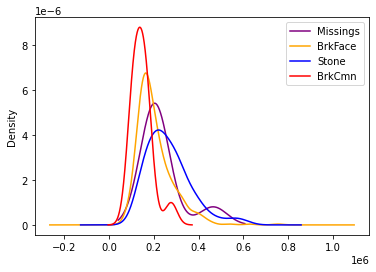

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)
 
dataset_cat_missing[dataset_cat_missing['MasVnrType'].isnull()]['SalePrice'].plot(kind="kde", color="purple", label="Missings")
dataset_cat_missing[dataset_cat_missing['MasVnrType'] == 'BrkFace']['SalePrice'].plot(kind="kde", color="orange", label="BrkFace")
dataset_cat_missing[dataset_cat_missing['MasVnrType'] == 'Stone']['SalePrice'].plot(kind="kde", color="blue", label="Stone")
dataset_cat_missing[dataset_cat_missing['MasVnrType'] == 'BrkCmn']['SalePrice'].plot(kind="kde", color="red", label="BrkCmn")

ax.legend()
plt.show()

In [56]:
# Imputación de variable categórica

dataset_cat_missing['MasVnrType'].fillna(value='BrkFace', inplace=True)

C:\Users\plustiadmin\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [57]:
dataset_cat_missing['MasVnrType'].value_counts()

None       864
BrkFace    453
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

#### Variable _BsmtQual_

In [58]:
dataHP['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [59]:
dataHP['BsmtQual'].value_counts()/len(dataset_cat_missing)

TA    0.444521
Gd    0.423288
Ex    0.082877
Fa    0.023973
Name: BsmtQual, dtype: float64

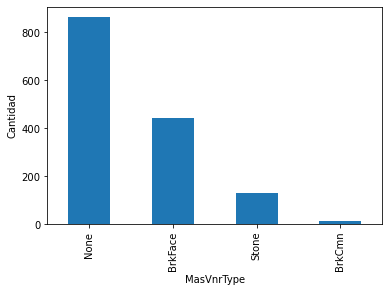

In [60]:
dataHP['MasVnrType'].value_counts().plot.bar()
plt.ylabel('Cantidad')
plt.xlabel('MasVnrType')
plt.show()

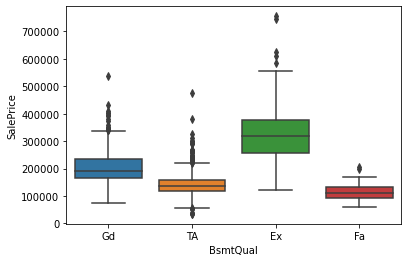

In [61]:
sns.boxplot(x=dataset_cat_missing['BsmtQual'], y= dataset_cat_missing['SalePrice'])
plt.show()

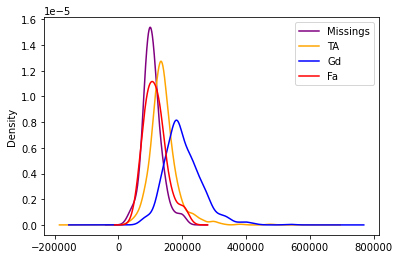

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)
 
dataset_cat_missing[dataset_cat_missing['BsmtQual'].isnull()]['SalePrice'].plot(kind="kde", color="purple", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'TA']['SalePrice'].plot(kind="kde", color="orange", label="TA")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'Gd']['SalePrice'].plot(kind="kde", color="blue", label="Gd")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'Fa']['SalePrice'].plot(kind="kde", color="red", label="Fa")

ax.legend()
plt.show()

In [63]:
dataset_cat_missing['BsmtQual'].fillna(value='Fa', inplace=True)

C:\Users\plustiadmin\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [64]:
dataset_cat_missing['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     72
Name: BsmtQual, dtype: int64

#### Variable _BsmtCond_

In [65]:
dataHP['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [66]:
dataHP['BsmtCond'].value_counts()/len(dataset_cat_missing)

TA    0.897945
Gd    0.044521
Fa    0.030822
Po    0.001370
Name: BsmtCond, dtype: float64

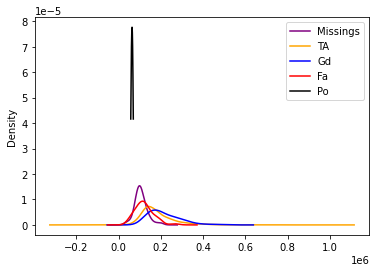

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111)
 
dataset_cat_missing[dataset_cat_missing['BsmtCond'].isnull()]['SalePrice'].plot(kind="kde", color="purple", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtCond'] == 'TA']['SalePrice'].plot(kind="kde", color="orange", label="TA")
dataset_cat_missing[dataset_cat_missing['BsmtCond'] == 'Gd']['SalePrice'].plot(kind="kde", color="blue", label="Gd")
dataset_cat_missing[dataset_cat_missing['BsmtCond'] == 'Fa']['SalePrice'].plot(kind="kde", color="red", label="Fa")
dataset_cat_missing[dataset_cat_missing['BsmtCond'] == 'Po']['SalePrice'].plot(kind="kde", color="black", label="Po")

ax.legend()
plt.show()

In [68]:
dataset_cat_missing['BsmtCond'].fillna(value='Fa', inplace=True)

C:\Users\plustiadmin\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [69]:
dataset_cat_missing['BsmtCond'].value_counts()

TA    1311
Fa      82
Gd      65
Po       2
Name: BsmtCond, dtype: int64

#### Variable _BsmtExposure_

In [70]:
dataHP['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [71]:
dataHP['BsmtExposure'].value_counts()/len(dataset_cat_missing)

No    0.652740
Av    0.151370
Gd    0.091781
Mn    0.078082
Name: BsmtExposure, dtype: float64

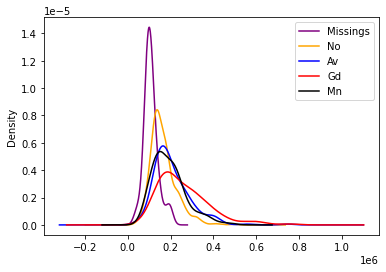

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111)
 
dataset_cat_missing[dataset_cat_missing['BsmtExposure'].isnull()]['SalePrice'].plot(kind="kde", color="purple", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtExposure'] == 'No']['SalePrice'].plot(kind="kde", color="orange", label="No")
dataset_cat_missing[dataset_cat_missing['BsmtExposure'] == 'Av']['SalePrice'].plot(kind="kde", color="blue", label="Av")
dataset_cat_missing[dataset_cat_missing['BsmtExposure'] == 'Gd']['SalePrice'].plot(kind="kde", color="red", label="Gd")
dataset_cat_missing[dataset_cat_missing['BsmtExposure'] == 'Mn']['SalePrice'].plot(kind="kde", color="black", label="Mn")

ax.legend()
plt.show()

In [73]:
dataset_cat_missing['BsmtExposure'].fillna(value='No', inplace=True)

C:\Users\plustiadmin\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [74]:
dataset_cat_missing['BsmtExposure'].value_counts()

No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

#### Variable _BsmtFinType1_

In [75]:
dataHP['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [76]:
dataHP['BsmtFinType1'].value_counts()/len(dataset_cat_missing)

Unf    0.294521
GLQ    0.286301
ALQ    0.150685
BLQ    0.101370
Rec    0.091096
LwQ    0.050685
Name: BsmtFinType1, dtype: float64

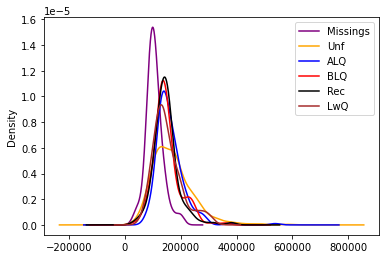

In [77]:
fig = plt.figure()
ax = fig.add_subplot(111)
 
dataset_cat_missing[dataset_cat_missing['BsmtFinType1'].isnull()]['SalePrice'].plot(kind="kde", color="purple", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'Unf']['SalePrice'].plot(kind="kde", color="orange", label="Unf")
dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'ALQ']['SalePrice'].plot(kind="kde", color="blue", label="ALQ")
dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'BLQ']['SalePrice'].plot(kind="kde", color="red", label="BLQ")
dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'Rec']['SalePrice'].plot(kind="kde", color="black", label="Rec")
dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'LwQ']['SalePrice'].plot(kind="kde", color="brown", label="LwQ")

ax.legend()
plt.show()

In [78]:
dataset_cat_missing['BsmtFinType1'].fillna(value='Rec', inplace=True)

C:\Users\plustiadmin\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [79]:
dataset_cat_missing['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
Rec    170
BLQ    148
LwQ     74
Name: BsmtFinType1, dtype: int64

#### Variable _BsmtFinType2_

In [80]:
dataHP['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [81]:
dataHP['BsmtFinType2'].value_counts()/len(dataset_cat_missing)

Unf    0.860274
Rec    0.036986
LwQ    0.031507
BLQ    0.022603
ALQ    0.013014
GLQ    0.009589
Name: BsmtFinType2, dtype: float64

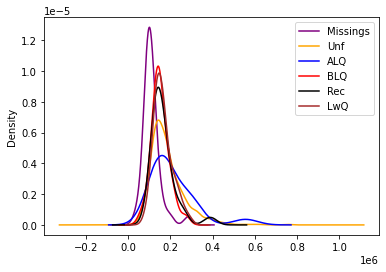

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111)
 
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'].isnull()]['SalePrice'].plot(kind="kde", color="purple", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'Unf']['SalePrice'].plot(kind="kde", color="orange", label="Unf")
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'ALQ']['SalePrice'].plot(kind="kde", color="blue", label="ALQ")
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'BLQ']['SalePrice'].plot(kind="kde", color="red", label="BLQ")
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'Rec']['SalePrice'].plot(kind="kde", color="black", label="Rec")
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'LwQ']['SalePrice'].plot(kind="kde", color="brown", label="LwQ")

ax.legend()
plt.show()

In [83]:
dataset_cat_missing['BsmtFinType2'].fillna(value='BLQ', inplace=True)

C:\Users\plustiadmin\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [84]:
dataset_cat_missing['BsmtFinType2'].value_counts()

Unf    1256
BLQ      71
Rec      54
LwQ      46
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

#### Variable _Electrical_

In [85]:
# Si vemos la suma del conteo podemos darnos cuenta que solo hace falta 1 valor. Porque el total de registro es de 1460 y los valores de abajo son 1459
# La variable categórica "Electrical" solo tiene un valor NaN, por lo que se puede rellenar con cualquier valor que es un cambio representativo
dataHP['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [86]:
dataHP['Electrical'].value_counts()/len(dataset_cat_missing)

SBrkr    0.913699
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
Mix      0.000685
Name: Electrical, dtype: float64

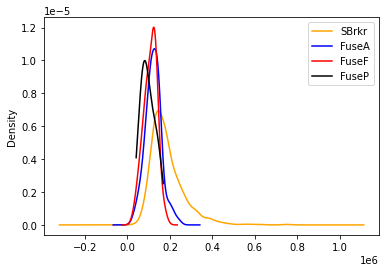

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)
 
#dataset_cat_missing[dataset_cat_missing['Electrical'].isnull()]['SalePrice'].plot(kind="kde", color="purple", label="Missings")
dataset_cat_missing[dataset_cat_missing['Electrical'] == 'SBrkr']['SalePrice'].plot(kind="kde", color="orange", label="SBrkr")
dataset_cat_missing[dataset_cat_missing['Electrical'] == 'FuseA']['SalePrice'].plot(kind="kde", color="blue", label="FuseA")
dataset_cat_missing[dataset_cat_missing['Electrical'] == 'FuseF']['SalePrice'].plot(kind="kde", color="red", label="FuseF")
dataset_cat_missing[dataset_cat_missing['Electrical'] == 'FuseP']['SalePrice'].plot(kind="kde", color="black", label="FuseP")
#dataset_cat_missing[dataset_cat_missing['Electrical'] == 'Mix']['SalePrice'].plot(kind="kde", color="brown", label="Mix")

ax.legend()
plt.show()

In [88]:
dataset_cat_missing['Electrical'].fillna(value='FuseA', inplace=True)

C:\Users\plustiadmin\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [89]:
dataset_cat_missing['Electrical'].value_counts()

SBrkr    1334
FuseA      95
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

#### Variable _GarageType_

In [90]:
dataHP['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [91]:
dataHP['GarageType'].value_counts()/len(dataset_cat_missing)

Attchd     0.595890
Detchd     0.265068
BuiltIn    0.060274
Basment    0.013014
CarPort    0.006164
2Types     0.004110
Name: GarageType, dtype: float64

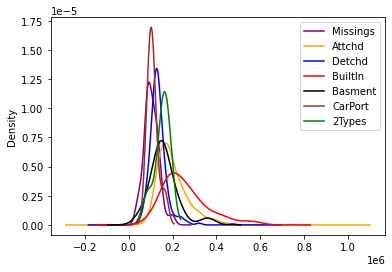

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111)
 
dataset_cat_missing[dataset_cat_missing['GarageType'].isnull()]['SalePrice'].plot(kind="kde", color="purple", label="Missings")
dataset_cat_missing[dataset_cat_missing['GarageType'] == 'Attchd']['SalePrice'].plot(kind="kde", color="orange", label="Attchd")
dataset_cat_missing[dataset_cat_missing['GarageType'] == 'Detchd']['SalePrice'].plot(kind="kde", color="blue", label="Detchd")
dataset_cat_missing[dataset_cat_missing['GarageType'] == 'BuiltIn']['SalePrice'].plot(kind="kde", color="red", label="BuiltIn")
dataset_cat_missing[dataset_cat_missing['GarageType'] == 'Basment']['SalePrice'].plot(kind="kde", color="black", label="Basment")
dataset_cat_missing[dataset_cat_missing['GarageType'] == 'CarPort']['SalePrice'].plot(kind="kde", color="brown", label="CarPort")
dataset_cat_missing[dataset_cat_missing['GarageType'] == '2Types']['SalePrice'].plot(kind="kde", color="green", label="2Types")

ax.legend()
plt.show()

In [93]:
dataset_cat_missing['GarageType'].fillna(value='Detchd', inplace=True)

C:\Users\plustiadmin\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [94]:
dataset_cat_missing['GarageType'].value_counts()

Attchd     870
Detchd     468
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

#### Variable _GarageFinish_

In [95]:
dataHP['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [96]:
dataHP['GarageFinish'].value_counts()/len(dataset_cat_missing)

Unf    0.414384
RFn    0.289041
Fin    0.241096
Name: GarageFinish, dtype: float64

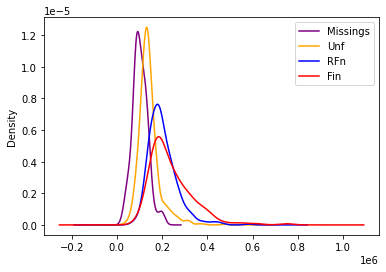

In [97]:
fig = plt.figure()
ax = fig.add_subplot(111)
 
dataset_cat_missing[dataset_cat_missing['GarageFinish'].isnull()]['SalePrice'].plot(kind="kde", color="purple", label="Missings")
dataset_cat_missing[dataset_cat_missing['GarageFinish'] == 'Unf']['SalePrice'].plot(kind="kde", color="orange", label="Unf")
dataset_cat_missing[dataset_cat_missing['GarageFinish'] == 'RFn']['SalePrice'].plot(kind="kde", color="blue", label="RFn")
dataset_cat_missing[dataset_cat_missing['GarageFinish'] == 'Fin']['SalePrice'].plot(kind="kde", color="red", label="Fin")

ax.legend()
plt.show()

In [98]:
dataset_cat_missing['GarageFinish'].fillna(value='Unf', inplace=True)

C:\Users\plustiadmin\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [99]:
dataset_cat_missing['GarageFinish'].value_counts()

Unf    686
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

#### Variable _GarageCond_

In [100]:
dataHP['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [101]:
dataHP['GarageCond'].value_counts()/len(dataset_cat_missing)

TA    0.908219
Fa    0.023973
Gd    0.006164
Po    0.004795
Ex    0.001370
Name: GarageCond, dtype: float64

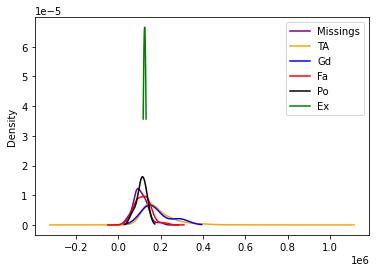

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111)
 
dataset_cat_missing[dataset_cat_missing['GarageCond'].isnull()]['SalePrice'].plot(kind="kde", color="purple", label="Missings")
dataset_cat_missing[dataset_cat_missing['GarageCond'] == 'TA']['SalePrice'].plot(kind="kde", color="orange", label="TA")
dataset_cat_missing[dataset_cat_missing['GarageCond'] == 'Gd']['SalePrice'].plot(kind="kde", color="blue", label="Gd")
dataset_cat_missing[dataset_cat_missing['GarageCond'] == 'Fa']['SalePrice'].plot(kind="kde", color="red", label="Fa")
dataset_cat_missing[dataset_cat_missing['GarageCond'] == 'Po']['SalePrice'].plot(kind="kde", color="black", label="Po")
dataset_cat_missing[dataset_cat_missing['GarageCond'] == 'Ex']['SalePrice'].plot(kind="kde", color="green", label="Ex")

ax.legend()
plt.show()

In [103]:
dataset_cat_missing['GarageCond'].fillna(value='Unf', inplace=True)

C:\Users\plustiadmin\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [104]:
dataset_cat_missing['GarageCond'].value_counts()

TA     1326
Unf      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

In [105]:
dataHP.shape, dataset_cat_missing.shape

((1460, 83), (1460, 11))

In [106]:
dataset_cat_missing.head(40)

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageCond,SalePrice
0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,208500
1,None,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,181500
2,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,223500
3,None,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,Unf,TA,140000
4,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,250000
5,None,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,Unf,TA,143000
6,Stone,Ex,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,307000
7,Stone,Gd,TA,Mn,ALQ,BLQ,SBrkr,Attchd,RFn,TA,200000
8,None,TA,TA,No,Unf,Unf,FuseF,Detchd,Unf,TA,129900
9,None,TA,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,118000


### Sustituyo las columnas donde hice la imputación de valores categóricas en el dataset original

In [112]:
# Se cambian las columnas calculadas en dataset_cat_missing a las columnas originales de dataHP, así de está manera en el DataFrame dataHP tenemos ya columnas sin NaNs.
# Con esto ya no tenemos NaN en el dataframe

dataHP[['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageCond']] = \
dataset_cat_missing[['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageCond']].combine_first(dataHP[['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageCond']])


In [114]:
dataHP[['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageCond']].head(40)

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageCond
0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA
1,None,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA
2,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA
3,None,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,Unf,TA
4,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA
5,None,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,Unf,TA
6,Stone,Ex,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA
7,Stone,Gd,TA,Mn,ALQ,BLQ,SBrkr,Attchd,RFn,TA
8,None,TA,TA,No,Unf,Unf,FuseF,Detchd,Unf,TA
9,None,TA,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA


In [113]:
dataHP.head(40)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_media,LotFrontage_mediana,MasVnrArea_media,MasVnrArea_mediana,GarageYrBlt_media,GarageYrBlt_mediana
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,2008,WD,Normal,208500,65.0,65.0,196.0,196.0,2003.0,2003.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,2007,WD,Normal,181500,80.0,80.0,104.0,0.0,1976.0,1976.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,2008,WD,Normal,223500,68.0,68.0,162.0,162.0,2001.0,2001.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,2006,WD,Abnorml,140000,60.0,60.0,104.0,0.0,1998.0,1998.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,2008,WD,Normal,250000,84.0,84.0,350.0,350.0,2000.0,2000.0
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,2009,WD,Normal,143000,85.0,85.0,104.0,0.0,1993.0,1993.0
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,2007,WD,Normal,307000,75.0,75.0,186.0,186.0,2004.0,2004.0
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,2009,WD,Normal,200000,70.0,69.0,240.0,240.0,1973.0,1973.0
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,2008,WD,Abnorml,129900,51.0,51.0,104.0,0.0,1931.0,1931.0
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,2008,WD,Normal,118000,50.0,50.0,104.0,0.0,1939.0,1939.0


In [115]:
#dataHP.columns
dataHP[['LotFrontage_media','MasVnrArea_media','GarageYrBlt_media',]].head(40)

,LotFrontage_media,MasVnrArea_media,GarageYrBlt_media
0,65.0,196.0,2003.0
1,80.0,104.0,1976.0
2,68.0,162.0,2001.0
3,60.0,104.0,1998.0
4,84.0,350.0,2000.0
5,85.0,104.0,1993.0
6,75.0,186.0,2004.0
7,70.0,240.0,1973.0
8,51.0,104.0,1931.0
9,50.0,104.0,1939.0


### Solamente la Columna FireplaceQu hace falta por imputar los Nan. Sin embargo, en este caso se toma la decisión de los NaN colocarlos como Missing Value
### Esto porque los NaN eran el 47% de los datos, por lo que se considera que puede ser una variable que en el futuro pueda ayudarnos en caso se complete

In [116]:
dataHP[['FireplaceQu']]

,FireplaceQu
0,NaN
1,TA
2,TA
3,Gd
4,TA
...,...
1455,TA
1456,TA
1457,Gd
1458,NaN


In [117]:
dataHP['FireplaceQu'].fillna(value='missing value', inplace=True)

In [118]:
dataHP[['FireplaceQu']]

,FireplaceQu
0,missing value
1,TA
2,TA
3,Gd
4,TA
...,...
1455,TA
1456,TA
1457,Gd
1458,missing value


In [119]:
# Eliminamos las columans repetidas donde hicimos la imputación de variables numéricas para no tener columnas duplicadas.

dataHP = dataHP.drop(['LotFrontage','LotFrontage_mediana','MasVnrArea_mediana','GarageYrBlt','GarageYrBlt_mediana',], axis=1)

In [120]:
# Dataset final con las columnas ya imputadas tanto numéricas como alfanuméricas

dataHP.shape

(1460, 78)

### Averiguar todas las columnas categóricas para hacer el Frequency Encoding

##### Frequency Encoding

In [121]:
def getCategoryVars(dataset):
    cat_colnames = []
    colnames = dataset.columns
    for col in colnames:
        if(dataset[col].dtype == 'object'):
            cat_colnames.append(col)
    return cat_colnames

In [122]:
cat_cols = getCategoryVars(dataHP)
cat_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [123]:
data_HP_freq_encoding = dataHP[cat_cols]
dataHP.shape, data_HP_freq_encoding.shape

((1460, 78), (1460, 39))

In [124]:
data_HP_freq_encoding.head(20)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,missing value,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,missing value,Attchd,Unf,TA,TA,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
7,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
8,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,...,TA,Min1,TA,Detchd,Unf,Fa,TA,Y,WD,Abnorml
9,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,...,TA,Typ,TA,Attchd,RFn,Gd,TA,Y,WD,Normal


In [125]:
def freq_encoding (data_HP_freq_encoding, cat_cols):
    for col in cat_cols:
        freq = data_HP_freq_encoding[col].value_counts()
        data_HP_freq_encoding[f'{col}_freq'] = data_HP_freq_encoding[col].map(freq)
    return data_HP_freq_encoding    

In [126]:
data_HP_freq_encoding = freq_encoding(data_HP_freq_encoding, cat_cols)

C:\Users\EFunes\AppData\Local\Temp\ipykernel_14292\2799716570.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_HP_freq_encoding[f'{col}_freq'] = data_HP_freq_encoding[col].map(freq)


In [127]:
data_HP_freq_encoding.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual_freq,Functional_freq,FireplaceQu_freq,GarageType_freq,GarageFinish_freq,GarageQual_freq,GarageCond_freq,PavedDrive_freq,SaleType_freq,SaleCondition_freq
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,586,1360,690,870,422,1311.0,1326,1340,1267,1198
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,735,1360,313,870,422,1311.0,1326,1340,1267,1198
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,586,1360,313,870,422,1311.0,1326,1340,1267,1198
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,586,1360,380,468,686,1311.0,1326,1340,1267,101
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,586,1360,313,870,422,1311.0,1326,1340,1267,1198


### Se hace la revión de algunas columnas al azar para comprobar que haya funcionado bien

#### Revisión de Variable _PavedDrive_

In [128]:
data_HP_freq_encoding[['PavedDrive','PavedDrive_freq']].head(40)

,PavedDrive,PavedDrive_freq
0,Y,1340
1,Y,1340
2,Y,1340
3,Y,1340
4,Y,1340
5,Y,1340
6,Y,1340
7,Y,1340
8,Y,1340
9,Y,1340


#### Revisión de Variable _MSZoning_

In [129]:
data_HP_freq_encoding[['MSZoning','MSZoning_freq']].head(40)

,MSZoning,MSZoning_freq
0,RL,1151
1,RL,1151
2,RL,1151
3,RL,1151
4,RL,1151
5,RL,1151
6,RL,1151
7,RL,1151
8,RM,218
9,RL,1151


#### Revisión de Variable _Neighborhood_

In [130]:
data_HP_freq_encoding[['Neighborhood','Neighborhood_freq']].head(40)

,Neighborhood,Neighborhood_freq
0,CollgCr,150
1,Veenker,11
2,CollgCr,150
3,Crawfor,51
4,NoRidge,41
5,Mitchel,49
6,Somerst,86
7,NWAmes,73
8,OldTown,113
9,BrkSide,58


In [131]:
datafinalHP = data_HP_freq_encoding
datafinalHP.shape, data_HP_freq_encoding.shape

((1460, 78), (1460, 78))

In [132]:
data_HP_freq_encoding.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition',
       'MSZoning_freq', 'Street_freq', 'LotShape_freq', 'LandContour_freq',
       'Utilities_freq', 'LotConfig_freq', 'LandSlope_freq',
       'Neighborhood_freq', 'Condition1_freq', 'Condition2_freq',
       'BldgType_freq', 'HouseStyle_freq', 'RoofStyle_freq', 'RoofMatl_freq',
       'Exterior1st_freq', 'Exterior2nd_freq', 'MasVnrType_freq',
       'ExterQual_freq', 'ExterCond_freq', 'Foundation_freq',

In [148]:
data_HP_freq_encoding.drop(['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition'], axis=1, inplace=True)

In [150]:
data_HP_freq_encoding.head()

,MSZoning_freq,Street_freq,LotShape_freq,LandContour_freq,Utilities_freq,LotConfig_freq,LandSlope_freq,Neighborhood_freq,Condition1_freq,Condition2_freq,...,KitchenQual_freq,Functional_freq,FireplaceQu_freq,GarageType_freq,GarageFinish_freq,GarageQual_freq,GarageCond_freq,PavedDrive_freq,SaleType_freq,SaleCondition_freq
0,1151,1454,925,1311,1459,1052,1382,150,1260,1445,...,586,1360,690,870,422,1311.0,1326,1340,1267,1198
1,1151,1454,925,1311,1459,47,1382,11,81,1445,...,735,1360,313,870,422,1311.0,1326,1340,1267,1198
2,1151,1454,484,1311,1459,1052,1382,150,1260,1445,...,586,1360,313,870,422,1311.0,1326,1340,1267,1198
3,1151,1454,484,1311,1459,263,1382,51,1260,1445,...,586,1360,380,468,686,1311.0,1326,1340,1267,101
4,1151,1454,484,1311,1459,47,1382,41,1260,1445,...,586,1360,313,870,422,1311.0,1326,1340,1267,1198


In [151]:
data_HP_freq_encoding.columns

Index(['MSZoning_freq', 'Street_freq', 'LotShape_freq', 'LandContour_freq',
       'Utilities_freq', 'LotConfig_freq', 'LandSlope_freq',
       'Neighborhood_freq', 'Condition1_freq', 'Condition2_freq',
       'BldgType_freq', 'HouseStyle_freq', 'RoofStyle_freq', 'RoofMatl_freq',
       'Exterior1st_freq', 'Exterior2nd_freq', 'MasVnrType_freq',
       'ExterQual_freq', 'ExterCond_freq', 'Foundation_freq', 'BsmtQual_freq',
       'BsmtCond_freq', 'BsmtExposure_freq', 'BsmtFinType1_freq',
       'BsmtFinType2_freq', 'Heating_freq', 'HeatingQC_freq',
       'CentralAir_freq', 'Electrical_freq', 'KitchenQual_freq',
       'Functional_freq', 'FireplaceQu_freq', 'GarageType_freq',
       'GarageFinish_freq', 'GarageQual_freq', 'GarageCond_freq',
       'PavedDrive_freq', 'SaleType_freq', 'SaleCondition_freq'],
      dtype='object')

In [152]:
data_HP_freq_encoding

,MSZoning_freq,Street_freq,LotShape_freq,LandContour_freq,Utilities_freq,LotConfig_freq,LandSlope_freq,Neighborhood_freq,Condition1_freq,Condition2_freq,...,KitchenQual_freq,Functional_freq,FireplaceQu_freq,GarageType_freq,GarageFinish_freq,GarageQual_freq,GarageCond_freq,PavedDrive_freq,SaleType_freq,SaleCondition_freq
0,1151,1454,925,1311,1459,1052,1382,150,1260,1445,...,586,1360,690,870,422,1311.0,1326,1340,1267,1198
1,1151,1454,925,1311,1459,47,1382,11,81,1445,...,735,1360,313,870,422,1311.0,1326,1340,1267,1198
2,1151,1454,484,1311,1459,1052,1382,150,1260,1445,...,586,1360,313,870,422,1311.0,1326,1340,1267,1198
3,1151,1454,484,1311,1459,263,1382,51,1260,1445,...,586,1360,380,468,686,1311.0,1326,1340,1267,101
4,1151,1454,484,1311,1459,47,1382,41,1260,1445,...,586,1360,313,870,422,1311.0,1326,1340,1267,1198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1151,1454,925,1311,1459,1052,1382,79,1260,1445,...,735,1360,313,870,422,1311.0,1326,1340,1267,1198
1456,1151,1454,925,1311,1459,1052,1382,73,1260,1445,...,735,31,313,870,686,1311.0,1326,1340,1267,1198
1457,1151,1454,925,1311,1459,1052,1382,51,1260,1445,...,586,1360,380,870,422,1311.0,1326,1340,1267,1198
1458,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,586,1360,690,870,686,1311.0,1326,1340,1267,1198


In [153]:
dataHP

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_media,MasVnrArea_media,GarageYrBlt_media
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,65.0,196.0,2003.0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,80.0,104.0,1976.0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,68.0,162.0,2001.0
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,60.0,104.0,1998.0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,84.0,350.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,8,2007,WD,Normal,175000,62.0,104.0,1999.0
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2010,WD,Normal,210000,85.0,119.0,1978.0
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2500,5,2010,WD,Normal,266500,66.0,104.0,1941.0
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,4,2010,WD,Normal,142125,68.0,104.0,1950.0


In [154]:
# Saber cuáles columnas tengo en el dataHP y no en data_HP_freq_encoding

print(set(dataHP.columns) - set(data_HP_freq_encoding.columns))

{'FireplaceQu', 'Condition1', 'CentralAir', 'BsmtHalfBath', 'LandContour', 'Heating', 'MSSubClass', 'BsmtExposure', 'Foundation', 'RoofStyle', 'Electrical', 'Functional', 'BsmtUnfSF', 'PavedDrive', 'SaleCondition', 'HalfBath', 'MoSold', 'Fireplaces', 'GarageYrBlt_media', 'YearBuilt', 'OverallQual', 'Condition2', 'TotRmsAbvGrd', 'LotShape', '2ndFlrSF', 'ScreenPorch', 'BsmtQual', 'BsmtFinSF1', 'KitchenAbvGr', 'GarageCond', 'MasVnrArea', 'GarageCars', 'MasVnrType', 'Exterior2nd', 'HeatingQC', 'YrSold', 'MiscVal', 'BsmtFinSF2', 'GarageQual', 'BsmtFullBath', 'MSZoning', 'FullBath', 'GarageFinish', 'BsmtFinType2', 'SalePrice', 'Utilities', 'BsmtCond', 'ExterCond', 'GarageType', 'SaleType', 'BldgType', 'OpenPorchSF', '3SsnPorch', 'Street', 'GarageArea', 'LotFrontage_media', 'MasVnrArea_media', 'LandSlope', 'HouseStyle', 'LowQualFinSF', 'EnclosedPorch', 'LotArea', 'Exterior1st', 'ExterQual', 'WoodDeckSF', 'PoolArea', 'Id', 'OverallCond', 'YearRemodAdd', 'KitchenQual', 'BedroomAbvGr', 'LotConfi

In [155]:
# Saber cuáles columnas tengo en data_HP_freq_encoding y no en dataHP

print(set(data_HP_freq_encoding.columns) - set(dataHP.columns))

{'HouseStyle_freq', 'Condition1_freq', 'BsmtFinType1_freq', 'BsmtQual_freq', 'Exterior2nd_freq', 'LotConfig_freq', 'KitchenQual_freq', 'RoofMatl_freq', 'Functional_freq', 'MasVnrType_freq', 'HeatingQC_freq', 'CentralAir_freq', 'BsmtFinType2_freq', 'LotShape_freq', 'GarageType_freq', 'BsmtExposure_freq', 'ExterCond_freq', 'PavedDrive_freq', 'Utilities_freq', 'Street_freq', 'FireplaceQu_freq', 'LandSlope_freq', 'RoofStyle_freq', 'Neighborhood_freq', 'BldgType_freq', 'LandContour_freq', 'Electrical_freq', 'SaleCondition_freq', 'BsmtCond_freq', 'GarageCond_freq', 'Heating_freq', 'SaleType_freq', 'Foundation_freq', 'Condition2_freq', 'GarageFinish_freq', 'Exterior1st_freq', 'MSZoning_freq', 'ExterQual_freq', 'GarageQual_freq'}


In [163]:
# Sustituyo las variables o columnas categóricas en la Tabla Original para mostrar solo valores numéricos en toda la tabla

dataHP[['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']] = \
    data_HP_freq_encoding[['MSZoning_freq','Street_freq','LotShape_freq','LandContour_freq','Utilities_freq','LotConfig_freq','LandSlope_freq','Neighborhood_freq','Condition1_freq','Condition2_freq','BldgType_freq','HouseStyle_freq','RoofStyle_freq','RoofMatl_freq','Exterior1st_freq','Exterior2nd_freq','MasVnrType_freq','ExterQual_freq','ExterCond_freq','Foundation_freq','BsmtQual_freq','BsmtCond_freq','BsmtExposure_freq','BsmtFinType1_freq','BsmtFinType2_freq','Heating_freq','HeatingQC_freq','CentralAir_freq','Electrical_freq','KitchenQual_freq','Functional_freq','FireplaceQu_freq','GarageType_freq','GarageFinish_freq','GarageQual_freq','GarageCond_freq','PavedDrive_freq','SaleType_freq','SaleCondition_freq']].values


## Tabla Final ya PreProcesada

#### 1. Se hizo imputación de variables numéricas
#### 2. Se hizo también imputación de variables categóricas
#### 3. Se hizo Frequency Encoding

In [164]:
dataHP

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_media,MasVnrArea_media,GarageYrBlt_media
0,1,60,1151.0,8450,1454.0,925.0,1311.0,1459.0,1052.0,1382.0,...,0,0,2,2008,1267.0,1198.0,208500,65.0,196.0,2003.0
1,2,20,1151.0,9600,1454.0,925.0,1311.0,1459.0,47.0,1382.0,...,0,0,5,2007,1267.0,1198.0,181500,80.0,104.0,1976.0
2,3,60,1151.0,11250,1454.0,484.0,1311.0,1459.0,1052.0,1382.0,...,0,0,9,2008,1267.0,1198.0,223500,68.0,162.0,2001.0
3,4,70,1151.0,9550,1454.0,484.0,1311.0,1459.0,263.0,1382.0,...,0,0,2,2006,1267.0,101.0,140000,60.0,104.0,1998.0
4,5,60,1151.0,14260,1454.0,484.0,1311.0,1459.0,47.0,1382.0,...,0,0,12,2008,1267.0,1198.0,250000,84.0,350.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,1151.0,7917,1454.0,925.0,1311.0,1459.0,1052.0,1382.0,...,0,0,8,2007,1267.0,1198.0,175000,62.0,104.0,1999.0
1456,1457,20,1151.0,13175,1454.0,925.0,1311.0,1459.0,1052.0,1382.0,...,0,0,2,2010,1267.0,1198.0,210000,85.0,119.0,1978.0
1457,1458,70,1151.0,9042,1454.0,925.0,1311.0,1459.0,1052.0,1382.0,...,0,2500,5,2010,1267.0,1198.0,266500,66.0,104.0,1941.0
1458,1459,20,1151.0,9717,1454.0,925.0,1311.0,1459.0,1052.0,1382.0,...,0,0,4,2010,1267.0,1198.0,142125,68.0,104.0,1950.0
